In [104]:
import pandas as pd
import os
import re
import keras
from keras import layers
from keras import ops
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding, Bidirectional,Dropout


In [105]:
folders = os.listdir("C:/Users/ryand/OneDrive/Desktop/Stock-Market-Prediction-AI-Model/Stock Data/CSVs/Raw CSVs/Top 8 to 10 Performing Stocks All Subsectors July01_2022 - Oct22_2024")
folders

['AAPL_daily_data.csv',
 'AAPL_news_sentiment.json',
 'ABBV_daily_data.csv',
 'ABBV_news_sentiment.json',
 'ADBE_daily_data.csv',
 'ADBE_news_sentiment.json',
 'AEP_daily_data.csv',
 'AEP_news_sentiment.json',
 'AMGN_daily_data.csv',
 'AMGN_news_sentiment.json',
 'AMT_daily_data.csv',
 'AMT_news_sentiment.json',
 'AMZN_daily_data.csv',
 'AMZN_news_sentiment.json',
 'APD_daily_data.csv',
 'APD_news_sentiment.json',
 'AVB_daily_data.csv',
 'AVB_news_sentiment.json',
 'AXP_daily_data.csv',
 'AXP_news_sentiment.json',
 'BAC_daily_data.csv',
 'BAC_news_sentiment.json',
 'BA_daily_data.csv',
 'BA_news_sentiment.json',
 'BKNG_daily_data.csv',
 'BKNG_news_sentiment.json',
 'BP_daily_data.csv',
 'BP_news_sentiment.json',
 'BRK.B_daily_data.csv',
 'BRK.B_news_sentiment.json',
 'CAT_daily_data.csv',
 'CAT_news_sentiment.json',
 'CL_daily_data.csv',
 'CL_news_sentiment.json',
 'COP_daily_data.csv',
 'COP_news_sentiment.json',
 'COST_daily_data.csv',
 'COST_news_sentiment.json',
 'CRM_daily_data.cs

In [106]:
files = os.listdir(f"Stock Data/CSVs/Raw CSVs/Top 8 to 10 Performing Stocks All Subsectors July01_2022 - Oct22_2024/")
        #print(files)
        # load each file
all_year_data = pd.DataFrame()
for file in files:
    print (file)
    if ".csv" in file:
        data = pd.read_csv(f"Stock Data/CSVs/Raw CSVs/Top 8 to 10 Performing Stocks All Subsectors July01_2022 - Oct22_2024/{file}")
        ticker_name = re.findall('(\w*)_daily_data\.csv', file)[0]
        data = data.assign(Ticker=ticker_name)
        all_year_data = pd.concat([all_year_data, data])

all_year_data

AAPL_daily_data.csv
AAPL_news_sentiment.json
ABBV_daily_data.csv
ABBV_news_sentiment.json
ADBE_daily_data.csv
ADBE_news_sentiment.json
AEP_daily_data.csv
AEP_news_sentiment.json
AMGN_daily_data.csv
AMGN_news_sentiment.json
AMT_daily_data.csv
AMT_news_sentiment.json
AMZN_daily_data.csv
AMZN_news_sentiment.json
APD_daily_data.csv
APD_news_sentiment.json
AVB_daily_data.csv
AVB_news_sentiment.json
AXP_daily_data.csv
AXP_news_sentiment.json
BAC_daily_data.csv
BAC_news_sentiment.json
BA_daily_data.csv
BA_news_sentiment.json
BKNG_daily_data.csv
BKNG_news_sentiment.json
BP_daily_data.csv
BP_news_sentiment.json
BRK.B_daily_data.csv
BRK.B_news_sentiment.json
CAT_daily_data.csv
CAT_news_sentiment.json
CL_daily_data.csv
CL_news_sentiment.json
COP_daily_data.csv
COP_news_sentiment.json
COST_daily_data.csv
COST_news_sentiment.json
CRM_daily_data.csv
CRM_news_sentiment.json
CVX_daily_data.csv
CVX_news_sentiment.json
C_daily_data.csv
C_news_sentiment.json
DD_daily_data.csv
DD_news_sentiment.json
DE_da

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker
0,2024-10-22,233.885,236.22,232.60,235.86,235.860000,38846578.0,0.0,1.0,AAPL
1,2024-10-21,234.450,236.85,234.45,236.48,236.480000,36254470.0,0.0,1.0,AAPL
2,2024-10-18,236.180,236.18,234.01,235.00,235.000000,46431472.0,0.0,1.0,AAPL
3,2024-10-17,233.430,233.85,230.52,232.15,232.150000,32993810.0,0.0,1.0,AAPL
4,2024-10-16,231.600,232.12,229.84,231.78,231.780000,34082240.0,0.0,1.0,AAPL
...,...,...,...,...,...,...,...,...,...,...
6279,1999-11-05,73.000,73.00,70.06,70.62,16.143723,7173300.0,0.0,1.0,XOM
6280,1999-11-04,73.690,73.94,72.50,73.00,16.687791,3636000.0,0.0,1.0,XOM
6281,1999-11-03,74.620,74.62,72.56,73.00,16.687791,3738600.0,0.0,1.0,XOM
6282,1999-11-02,74.370,75.19,73.94,74.12,16.943822,2950100.0,0.0,1.0,XOM


In [107]:
all_year_data['Daily_Change_In_Price'] = (all_year_data['4. close'] - all_year_data['4. close'].shift(1)) / all_year_data['4. close'].shift(1)
all_year_data

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker,Daily_Change_In_Price
0,2024-10-22,233.885,236.22,232.60,235.86,235.860000,38846578.0,0.0,1.0,AAPL,NaN
1,2024-10-21,234.450,236.85,234.45,236.48,236.480000,36254470.0,0.0,1.0,AAPL,0.002629
2,2024-10-18,236.180,236.18,234.01,235.00,235.000000,46431472.0,0.0,1.0,AAPL,-0.006258
3,2024-10-17,233.430,233.85,230.52,232.15,232.150000,32993810.0,0.0,1.0,AAPL,-0.012128
4,2024-10-16,231.600,232.12,229.84,231.78,231.780000,34082240.0,0.0,1.0,AAPL,-0.001594
...,...,...,...,...,...,...,...,...,...,...,...
6279,1999-11-05,73.000,73.00,70.06,70.62,16.143723,7173300.0,0.0,1.0,XOM,-0.049657
6280,1999-11-04,73.690,73.94,72.50,73.00,16.687791,3636000.0,0.0,1.0,XOM,0.033702
6281,1999-11-03,74.620,74.62,72.56,73.00,16.687791,3738600.0,0.0,1.0,XOM,0.000000
6282,1999-11-02,74.370,75.19,73.94,74.12,16.943822,2950100.0,0.0,1.0,XOM,0.015342


In [108]:
all_year_data['Binary_Returns'] = all_year_data['Daily_Change_In_Price'].apply(lambda x: 1 if x > 0 else 0)

In [109]:
all_year_data["date"] = pd.to_datetime(all_year_data['date'])
all_year_data.set_index("date",inplace=True) 
all_year_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 464987 entries, 2024-10-22 to 1999-11-01
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   1. open                464987 non-null  float64
 1   2. high                464987 non-null  float64
 2   3. low                 464987 non-null  float64
 3   4. close               464987 non-null  float64
 4   5. adjusted close      464987 non-null  float64
 5   6. volume              464987 non-null  float64
 6   7. dividend amount     464987 non-null  float64
 7   8. split coefficient   464987 non-null  float64
 8   Ticker                 464987 non-null  object 
 9   Daily_Change_In_Price  464986 non-null  float64
 10  Binary_Returns         464987 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 42.6+ MB


# Apple

In [110]:
apple_df = all_year_data[all_year_data["Ticker"]=='AAPL']
apple_df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker,Daily_Change_In_Price,Binary_Returns
date,,,,,,,,,,,
2024-10-22,233.885,236.22,232.60,235.86,235.860000,38846578.0,0.0,1.0,AAPL,NaN,0
2024-10-21,234.450,236.85,234.45,236.48,236.480000,36254470.0,0.0,1.0,AAPL,0.002629,1
2024-10-18,236.180,236.18,234.01,235.00,235.000000,46431472.0,0.0,1.0,AAPL,-0.006258,0
2024-10-17,233.430,233.85,230.52,232.15,232.150000,32993810.0,0.0,1.0,AAPL,-0.012128,0
2024-10-16,231.600,232.12,229.84,231.78,231.780000,34082240.0,0.0,1.0,AAPL,-0.001594,0
...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,84.620,88.37,84.00,88.31,0.665793,3721500.0,0.0,1.0,AAPL,-0.083636,0
1999-11-04,82.060,85.37,80.62,83.62,0.630434,3384700.0,0.0,1.0,AAPL,-0.053108,0
1999-11-03,81.620,83.25,81.00,81.50,0.614450,2932700.0,0.0,1.0,AAPL,-0.025353,0


In [111]:
apple_df= apple_df.drop("Ticker",axis=1) 

In [112]:
# 1. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['4. close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

# 2. Percentage Price Oscillator (PPO)
def calculate_ppo(data, fast=12, slow=26):
    ema_fast = data['4. close'].ewm(span=fast, adjust=False).mean()
    ema_slow = data['4. close'].ewm(span=slow, adjust=False).mean()
    data['PPO'] = (ema_fast - ema_slow) / ema_slow * 100

# 3. Rate of Change (ROC)
def calculate_roc(data, periods=14):
    data['ROC'] = data['4. close'].pct_change(periods=periods) * 100

# 4. Williams %R
def calculate_williams_r(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['Williams_%R'] = (highest_high - data['4. close']) / (highest_high - lowest_low) * -100

# 5. Stochastic Oscillator (%K and %D)
def calculate_stochastic(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['%K'] = (data['4. close'] - lowest_low) / (highest_high - lowest_low) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()

# Applying the indicators to apple_df
calculate_rsi(apple_df)
calculate_ppo(apple_df)
calculate_roc(apple_df)
calculate_williams_r(apple_df)
calculate_stochastic(apple_df)

In [113]:
apple_df = apple_df.dropna()

In [114]:
apple_df[['RSI','PPO', 'ROC','Williams_%R', '%K', '%D',"Binary_Returns"]].corr()

,RSI,PPO,ROC,Williams_%R,%K,%D,Binary_Returns
RSI,1.000000,0.556803,0.421147,0.809463,0.809463,0.858918,0.214950
PPO,0.556803,1.000000,0.768488,0.406281,0.406281,0.470448,0.033242
ROC,0.421147,0.768488,1.000000,0.301251,0.301251,0.324340,0.045461
Williams_%R,0.809463,0.406281,0.301251,1.000000,1.000000,0.918330,0.366259
%K,0.809463,0.406281,0.301251,1.000000,1.000000,0.918330,0.366259
%D,0.858918,0.470448,0.324340,0.918330,0.918330,1.000000,0.131719
Binary_Returns,0.214950,0.033242,0.045461,0.366259,0.366259,0.131719,1.000000


In [115]:
import seaborn as sns

<Axes: >

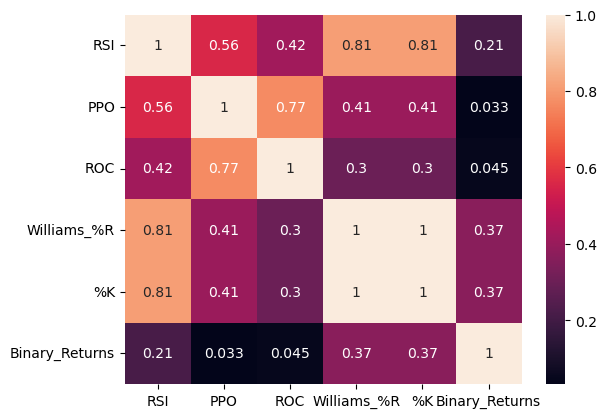

In [116]:
sns.heatmap(apple_df[['RSI','PPO', 'ROC','Williams_%R', '%K',"Binary_Returns"]].corr(), annot=True)

In [117]:
X = apple_df[['RSI','PPO', 'ROC','Williams_%R', '%K','%D']]
y = apple_df["Binary_Returns"]

In [118]:
y.value_counts()

Binary_Returns
0    3300
1    2969
Name: count, dtype: int64

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [120]:
from sklearn.preprocessing import StandardScaler
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [121]:
# Import our dependencies
import pandas as pd
import sklearn as skl
import tensorflow as tf



In [122]:
X_train_scaled.shape

(5015, 6)

In [123]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [124]:
len(X.columns)

6

In [125]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

# Set the input nodes to the number of features
input_nodes = len(X.columns)

nn_model.add(tf.keras.layers.Dense(units=12, activation="sigmoid", input_dim=input_nodes))

nn_model.add(tf.keras.layers.Dense(units=6, activation="sigmoid"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

In [126]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.5549 - loss: 0.6873
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.6216 - loss: 0.6680
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.6224 - loss: 0.6565
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.6396 - loss: 0.6392
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.6549 - loss: 0.6244
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.6728 - loss: 0.6074
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.7179 - loss: 0.5734
Epoch 8/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.7298 - loss: 0.5508
Epoch 9/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.7504 - loss: 0.5211
Epoch 10/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.7815 - loss: 0.4964
Epoch 11/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.8076 - loss: 0.4671
Epoch 12/25
157/157 ━━━━━━━━━━

In [127]:
fit_model.history["accuracy"]

[0.5964107513427734,
 0.6221336126327515,
 0.6334995031356812,
 0.6464605927467346,
 0.6654037833213806,
 0.690528392791748,
 0.7170488238334656,
 0.7393818497657776,
 0.7609172463417053,
 0.7802592515945435,
 0.800000011920929,
 0.8073778748512268,
 0.8129611015319824,
 0.8173479437828064,
 0.8175473809242249,
 0.8209372162818909,
 0.8205384016036987,
 0.8203389644622803,
 0.8187437653541565,
 0.8183449506759644,
 0.8201395869255066,
 0.8195413947105408,
 0.8191425800323486,
 0.8207377791404724,
 0.8201395869255066]

<Axes: >

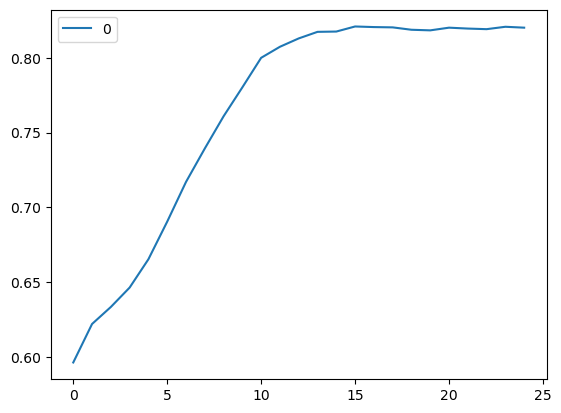

In [128]:
pd.DataFrame(fit_model.history["accuracy"]).plot()

In [129]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - 3ms/step - accuracy: 0.8150 - loss: 0.3957
Loss: 0.3956657648086548, Accuracy: 0.8149920105934143


In [130]:
all_year_data["Ticker"].unique()

array(['AAPL', 'ABBV', 'ADBE', 'AEP', 'AMGN', 'AMT', 'AMZN', 'APD', 'AVB',
       'AXP', 'BAC', 'BA', 'BKNG', 'BP', 'B', 'CAT', 'CL', 'COP', 'COST',
       'CRM', 'CVX', 'C', 'DD', 'DE', 'DLR', 'DUK', 'D', 'ED', 'EQIX',
       'EXC', 'FCX', 'GOOGL', 'GS', 'HAL', 'HD', 'HON', 'IP', 'JNJ',
       'JPM', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MCD', 'MDLZ', 'META',
       'MMM', 'MRK', 'MRNA', 'MSFT', 'MS', 'NEE', 'NEM', 'NKE', 'NVDA',
       'O', 'PEP', 'PFE', 'PG', 'PLD', 'PM', 'PSA', 'PXD', 'RTX', 'SBUX',
       'SHW', 'SLB', 'SO', 'SPG', 'SRE', 'TSLA', 'UNH', 'UNP', 'VMC',
       'WFC', 'WMT', 'XOM'], dtype=object)

# AbbVie Inc 

In [131]:
AbbVie_Inc = all_year_data[all_year_data["Ticker"]=='ABBV']
AbbVie_Inc

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker,Daily_Change_In_Price,Binary_Returns
date,,,,,,,,,,,
2024-10-22,186.32,189.100,186.230,188.7600,188.760000,4210359.0,0.0,1.0,ABBV,1.431847,1
2024-10-21,188.71,189.380,185.890,186.5400,186.540000,4496592.0,0.0,1.0,ABBV,-0.011761,0
2024-10-18,188.97,189.690,188.164,188.8600,188.860000,5607902.0,0.0,1.0,ABBV,0.012437,1
2024-10-17,190.54,191.620,188.460,188.5700,188.570000,4419002.0,0.0,1.0,ABBV,-0.001536,0
2024-10-16,190.45,191.035,188.730,190.4600,190.460000,5575983.0,0.0,1.0,ABBV,0.010023,1
...,...,...,...,...,...,...,...,...,...,...,...
2013-01-08,34.29,34.640,33.360,33.7100,20.734984,17863300.0,0.0,1.0,ABBV,-0.005605,0
2013-01-07,34.15,35.450,34.150,34.4600,21.196308,17897100.0,0.0,1.0,ABBV,0.022249,1
2013-01-04,34.62,34.890,34.250,34.3908,21.153744,21372100.0,0.0,1.0,ABBV,-0.002008,0


In [132]:
AbbVie_Inc= AbbVie_Inc.drop("Ticker",axis=1) 

In [133]:
# 1. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['4. close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

# 2. Percentage Price Oscillator (PPO)
def calculate_ppo(data, fast=12, slow=26):
    ema_fast = data['4. close'].ewm(span=fast, adjust=False).mean()
    ema_slow = data['4. close'].ewm(span=slow, adjust=False).mean()
    data['PPO'] = (ema_fast - ema_slow) / ema_slow * 100

# 3. Rate of Change (ROC)
def calculate_roc(data, periods=14):
    data['ROC'] = data['4. close'].pct_change(periods=periods) * 100

# 4. Williams %R
def calculate_williams_r(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['Williams_%R'] = (highest_high - data['4. close']) / (highest_high - lowest_low) * -100

# 5. Stochastic Oscillator (%K and %D)
def calculate_stochastic(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['%K'] = (data['4. close'] - lowest_low) / (highest_high - lowest_low) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()

import pandas as pd

# Assuming 'apple_df' contains columns: '2. high', '3. low', '4. close'

def calculate_atr(data, period=14):
    # Calculate the three True Range components
    data['High-Low'] = data['2. high'] - data['3. low']
    data['High-PreviousClose'] = abs(data['2. high'] - data['4. close'].shift(1))
    data['Low-PreviousClose'] = abs(data['3. low'] - data['4. close'].shift(1))
    
    # True Range is the max of the three components
    data['TrueRange'] = data[['High-Low', 'High-PreviousClose', 'Low-PreviousClose']].max(axis=1)
    
    # Calculate the ATR as a moving average of the True Range
    data['ATR'] = data['TrueRange'].rolling(window=period).mean()
    
    # Drop intermediate columns used for calculation if no longer needed
    data.drop(columns=['High-Low', 'High-PreviousClose', 'Low-PreviousClose', 'TrueRange'], inplace=True)
    
    return data

# Applying the indicators to apple_df
calculate_rsi(AbbVie_Inc)
calculate_ppo(AbbVie_Inc)
calculate_roc(AbbVie_Inc)
calculate_williams_r(AbbVie_Inc)
calculate_stochastic(AbbVie_Inc)
calculate_atr(AbbVie_Inc)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Daily_Change_In_Price,Binary_Returns,RSI,PPO,ROC,Williams_%R,%K,%D,ATR
date,,,,,,,,,,,,,,,,,
2024-10-22,186.32,189.100,186.230,188.7600,188.760000,4210359.0,0.0,1.0,1.431847,1,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2024-10-21,188.71,189.380,185.890,186.5400,186.540000,4496592.0,0.0,1.0,-0.011761,0,NaN,-0.093901,NaN,NaN,NaN,NaN,NaN
2024-10-18,188.97,189.690,188.164,188.8600,188.860000,5607902.0,0.0,1.0,0.012437,1,NaN,-0.068263,NaN,NaN,NaN,NaN,NaN
2024-10-17,190.54,191.620,188.460,188.5700,188.570000,4419002.0,0.0,1.0,-0.001536,0,NaN,-0.059671,NaN,NaN,NaN,NaN,NaN
2024-10-16,190.45,191.035,188.730,190.4600,190.460000,5575983.0,0.0,1.0,0.010023,1,NaN,0.027657,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-08,34.29,34.640,33.360,33.7100,20.734984,17863300.0,0.0,1.0,-0.005605,0,26.923077,-2.676663,-9.648888,-92.678227,7.321773,10.404624,1.242143
2013-01-07,34.15,35.450,34.150,34.4600,21.196308,17897100.0,0.0,1.0,0.022249,1,35.055351,-2.606750,-6.587151,-78.227360,21.772640,13.359024,1.283571
2013-01-04,34.62,34.890,34.250,34.3908,21.153744,21372100.0,0.0,1.0,-0.002008,0,28.574481,-2.538817,-8.535106,-79.560694,20.439306,16.511240,1.243571


In [134]:
AbbVie_Inc = AbbVie_Inc.dropna()
AbbVie_Inc

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Daily_Change_In_Price,Binary_Returns,RSI,PPO,ROC,Williams_%R,%K,%D,ATR
date,,,,,,,,,,,,,,,,,
2024-10-01,197.65,198.97,196.4200,196.9600,195.381550,3924607.0,0.0,1.0,0.000711,1,79.942529,0.989385,5.585933,-18.600777,81.399223,88.333791,2.932986
2024-09-30,194.85,197.62,194.3669,197.4800,195.897383,4550849.0,0.0,1.0,0.002640,1,77.628205,1.052321,4.564227,-14.176974,85.823026,88.387105,2.940350
2024-09-27,192.60,196.13,190.2700,194.7900,193.228941,4892025.0,0.0,1.0,-0.013622,0,67.277778,0.978988,3.298510,-40.820313,59.179687,75.467312,3.229636
2024-09-26,190.10,192.87,189.6150,191.9000,190.362101,6215788.0,0.0,1.0,-0.014836,0,53.789474,0.791751,0.756064,-75.574559,24.425441,56.476051,3.423207
2024-09-25,194.00,194.57,190.9600,191.2600,189.727230,5589494.0,0.0,1.0,-0.003335,0,48.355263,0.609623,-0.312728,-82.415820,17.584180,33.729769,3.267493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-08,34.29,34.64,33.3600,33.7100,20.734984,17863300.0,0.0,1.0,-0.005605,0,26.923077,-2.676663,-9.648888,-92.678227,7.321773,10.404624,1.242143
2013-01-07,34.15,35.45,34.1500,34.4600,21.196308,17897100.0,0.0,1.0,0.022249,1,35.055351,-2.606750,-6.587151,-78.227360,21.772640,13.359024,1.283571
2013-01-04,34.62,34.89,34.2500,34.3908,21.153744,21372100.0,0.0,1.0,-0.002008,0,28.574481,-2.538817,-8.535106,-79.560694,20.439306,16.511240,1.243571


In [135]:
X = AbbVie_Inc[['RSI','PPO', 'ROC','Williams_%R', '%K','%D','ATR']]
y = AbbVie_Inc["Binary_Returns"]

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [137]:
from sklearn.preprocessing import StandardScaler
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [138]:
X_train_scaled.shape


(2365, 7)

In [139]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

# Set the input nodes to the number of features
input_nodes = len(X.columns)

nn_model.add(tf.keras.layers.Dense(units=100, activation="sigmoid", input_dim=input_nodes))

nn_model.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,901 (23.05 KB)

 Trainable params: 5,901 (23.05 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.5691 - loss: 0.6844
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6024 - loss: 0.6601
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.6294 - loss: 0.6359
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.6773 - loss: 0.5922
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.7119 - loss: 0.5737
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.7473 - loss: 0.5284
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.7591 - loss: 0.5090
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.7873 - loss: 0.4717
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.8150 - loss: 0.4393
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.8181 - loss: 0.4182


In [141]:
fit_model.history["accuracy"]

[0.5928118228912354,
 0.6186046600341797,
 0.6482029557228088,
 0.6794925928115845,
 0.7293868660926819,
 0.7530655264854431,
 0.777167022228241,
 0.7987315058708191,
 0.8084566593170166,
 0.8173361420631409]

<Axes: >

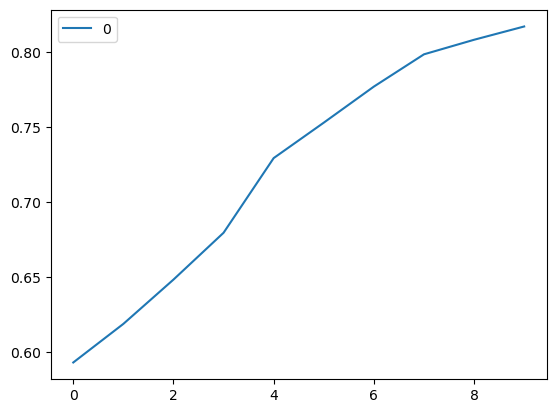

In [142]:
pd.DataFrame(fit_model.history["accuracy"]).plot()

In [143]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

19/19 - 0s - 6ms/step - accuracy: 0.8294 - loss: 0.4090
Loss: 0.4089973568916321, Accuracy: 0.8293918967247009


In [144]:
all_year_data["Ticker"].unique()

array(['AAPL', 'ABBV', 'ADBE', 'AEP', 'AMGN', 'AMT', 'AMZN', 'APD', 'AVB',
       'AXP', 'BAC', 'BA', 'BKNG', 'BP', 'B', 'CAT', 'CL', 'COP', 'COST',
       'CRM', 'CVX', 'C', 'DD', 'DE', 'DLR', 'DUK', 'D', 'ED', 'EQIX',
       'EXC', 'FCX', 'GOOGL', 'GS', 'HAL', 'HD', 'HON', 'IP', 'JNJ',
       'JPM', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MCD', 'MDLZ', 'META',
       'MMM', 'MRK', 'MRNA', 'MSFT', 'MS', 'NEE', 'NEM', 'NKE', 'NVDA',
       'O', 'PEP', 'PFE', 'PG', 'PLD', 'PM', 'PSA', 'PXD', 'RTX', 'SBUX',
       'SHW', 'SLB', 'SO', 'SPG', 'SRE', 'TSLA', 'UNH', 'UNP', 'VMC',
       'WFC', 'WMT', 'XOM'], dtype=object)

# Adobe 

In [145]:
ADBE_df = all_year_data[all_year_data["Ticker"]=='ADBE']

In [146]:
ADBE_df= ADBE_df.drop("Ticker",axis=1) 

In [147]:
# 1. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['4. close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

# 2. Percentage Price Oscillator (PPO)
def calculate_ppo(data, fast=12, slow=26):
    ema_fast = data['4. close'].ewm(span=fast, adjust=False).mean()
    ema_slow = data['4. close'].ewm(span=slow, adjust=False).mean()
    data['PPO'] = (ema_fast - ema_slow) / ema_slow * 100

# 3. Rate of Change (ROC)
def calculate_roc(data, periods=14):
    data['ROC'] = data['4. close'].pct_change(periods=periods) * 100

# 4. Williams %R
def calculate_williams_r(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['Williams_%R'] = (highest_high - data['4. close']) / (highest_high - lowest_low) * -100

# 5. Stochastic Oscillator (%K and %D)
def calculate_stochastic(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['%K'] = (data['4. close'] - lowest_low) / (highest_high - lowest_low) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()

import pandas as pd

# Assuming 'apple_df' contains columns: '2. high', '3. low', '4. close'

def calculate_atr(data, period=14):
    # Calculate the three True Range components
    data['High-Low'] = data['2. high'] - data['3. low']
    data['High-PreviousClose'] = abs(data['2. high'] - data['4. close'].shift(1))
    data['Low-PreviousClose'] = abs(data['3. low'] - data['4. close'].shift(1))
    
    # True Range is the max of the three components
    data['TrueRange'] = data[['High-Low', 'High-PreviousClose', 'Low-PreviousClose']].max(axis=1)
    
    # Calculate the ATR as a moving average of the True Range
    data['ATR'] = data['TrueRange'].rolling(window=period).mean()
    
    # Drop intermediate columns used for calculation if no longer needed
    data.drop(columns=['High-Low', 'High-PreviousClose', 'Low-PreviousClose', 'TrueRange'], inplace=True)
    
    return data

# Applying the indicators to apple_df
calculate_rsi(ADBE_df)
calculate_ppo(ADBE_df)
calculate_roc(ADBE_df)
calculate_williams_r(ADBE_df)
calculate_stochastic(ADBE_df)
calculate_atr(ADBE_df)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Daily_Change_In_Price,Binary_Returns,RSI,PPO,ROC,Williams_%R,%K,%D,ATR
date,,,,,,,,,,,,,,,,,
2024-10-22,496.43,497.3400,488.3600,493.11,493.110000,2388721.0,0.0,1.0,13.040718,1,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2024-10-21,494.60,500.6499,492.9600,497.71,497.710000,1679657.0,0.0,1.0,0.009329,1,NaN,0.074364,NaN,NaN,NaN,NaN,NaN
2024-10-18,491.29,499.0000,491.0501,494.90,494.900000,2011121.0,0.0,1.0,-0.005646,0,NaN,0.086334,NaN,NaN,NaN,NaN,NaN
2024-10-17,506.51,507.5000,495.2300,496.83,496.830000,2769241.0,0.0,1.0,0.003900,1,NaN,0.125873,NaN,NaN,NaN,NaN,NaN
2024-10-16,506.39,506.8400,500.2500,502.54,502.540000,1859116.0,0.0,1.0,0.011493,1,NaN,0.247368,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,71.25,72.0000,69.3800,70.69,17.544766,1705200.0,0.0,1.0,-0.009667,0,40.322581,1.800117,-4.227070,-86.382536,13.617464,18.521137,3.277143
1999-11-04,70.25,71.0000,68.0000,68.88,17.095536,2308500.0,0.0,1.0,-0.025605,0,31.474820,1.260741,-8.233413,-92.000000,8.000000,13.079695,3.361429
1999-11-03,69.06,69.7500,67.5600,68.81,17.078163,1812000.0,0.0,1.0,-0.001016,0,31.934307,0.814366,-7.946488,-89.073427,10.926573,10.848012,3.294286


In [148]:
ADBE_df = ADBE_df.dropna()

In [149]:
X = ADBE_df[['RSI','PPO', 'ROC','Williams_%R', '%K','%D','ATR']]
y = ADBE_df["Binary_Returns"]

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [151]:
from sklearn.preprocessing import StandardScaler
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [152]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

# Set the input nodes to the number of features
input_nodes = len(X.columns)

nn_model.add(tf.keras.layers.Dense(units=12, activation="sigmoid", input_dim=input_nodes))

nn_model.add(tf.keras.layers.Dense(units=6, activation="sigmoid"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 12)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [153]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=4)

Epoch 1/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.5214 - loss: 0.6991
Epoch 2/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.6185 - loss: 0.6693
Epoch 3/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.6355 - loss: 0.6492
Epoch 4/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.6519 - loss: 0.6323


In [154]:
fit_model.history["accuracy"]

[0.5343968272209167, 0.6239281892776489, 0.637487530708313, 0.6606181263923645]

In [155]:
all_year_data["Ticker"].unique()

array(['AAPL', 'ABBV', 'ADBE', 'AEP', 'AMGN', 'AMT', 'AMZN', 'APD', 'AVB',
       'AXP', 'BAC', 'BA', 'BKNG', 'BP', 'B', 'CAT', 'CL', 'COP', 'COST',
       'CRM', 'CVX', 'C', 'DD', 'DE', 'DLR', 'DUK', 'D', 'ED', 'EQIX',
       'EXC', 'FCX', 'GOOGL', 'GS', 'HAL', 'HD', 'HON', 'IP', 'JNJ',
       'JPM', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MCD', 'MDLZ', 'META',
       'MMM', 'MRK', 'MRNA', 'MSFT', 'MS', 'NEE', 'NEM', 'NKE', 'NVDA',
       'O', 'PEP', 'PFE', 'PG', 'PLD', 'PM', 'PSA', 'PXD', 'RTX', 'SBUX',
       'SHW', 'SLB', 'SO', 'SPG', 'SRE', 'TSLA', 'UNH', 'UNP', 'VMC',
       'WFC', 'WMT', 'XOM'], dtype=object)

# American Electric Power

In [156]:
AEP_df = all_year_data[all_year_data["Ticker"]=='AEP']



In [157]:
AEP_df= AEP_df.drop("Ticker",axis=1) 

In [158]:
# 1. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['4. close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

# 2. Percentage Price Oscillator (PPO)
def calculate_ppo(data, fast=12, slow=26):
    ema_fast = data['4. close'].ewm(span=fast, adjust=False).mean()
    ema_slow = data['4. close'].ewm(span=slow, adjust=False).mean()
    data['PPO'] = (ema_fast - ema_slow) / ema_slow * 100

# 3. Rate of Change (ROC)
def calculate_roc(data, periods=14):
    data['ROC'] = data['4. close'].pct_change(periods=periods) * 100

# 4. Williams %R
def calculate_williams_r(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['Williams_%R'] = (highest_high - data['4. close']) / (highest_high - lowest_low) * -100

# 5. Stochastic Oscillator (%K and %D)
def calculate_stochastic(data, lookback=14):
    highest_high = data['2. high'].rolling(window=lookback).max()
    lowest_low = data['3. low'].rolling(window=lookback).min()
    data['%K'] = (data['4. close'] - lowest_low) / (highest_high - lowest_low) * 100
    data['%D'] = data['%K'].rolling(window=3).mean()

import pandas as pd

# Assuming 'apple_df' contains columns: '2. high', '3. low', '4. close'

def calculate_atr(data, period=14):
    # Calculate the three True Range components
    data['High-Low'] = data['2. high'] - data['3. low']
    data['High-PreviousClose'] = abs(data['2. high'] - data['4. close'].shift(1))
    data['Low-PreviousClose'] = abs(data['3. low'] - data['4. close'].shift(1))
    
    # True Range is the max of the three components
    data['TrueRange'] = data[['High-Low', 'High-PreviousClose', 'Low-PreviousClose']].max(axis=1)
    
    # Calculate the ATR as a moving average of the True Range
    data['ATR'] = data['TrueRange'].rolling(window=period).mean()
    
    # Drop intermediate columns used for calculation if no longer needed
    data.drop(columns=['High-Low', 'High-PreviousClose', 'Low-PreviousClose', 'TrueRange'], inplace=True)
    
    return data

# Applying the indicators to apple_df
calculate_rsi(AEP_df)
calculate_ppo(AEP_df)
calculate_roc(AEP_df)
calculate_williams_r(AEP_df)
calculate_stochastic(AEP_df)
calculate_atr(AEP_df)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Daily_Change_In_Price,Binary_Returns,RSI,PPO,ROC,Williams_%R,%K,%D,ATR
date,,,,,,,,,,,,,,,,,
2024-10-22,99.67,100.2500,99.21,99.89,99.890000,1981777.0,0.0,1.0,0.456972,1,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2024-10-21,100.78,101.0800,99.66,100.16,100.160000,2548122.0,0.0,1.0,0.002703,1,NaN,0.021558,NaN,NaN,NaN,NaN,NaN
2024-10-18,100.83,100.8400,99.76,100.69,100.690000,3111829.0,0.0,1.0,0.005292,1,NaN,0.080473,NaN,NaN,NaN,NaN,NaN
2024-10-17,101.75,101.8150,100.57,100.91,100.910000,2008881.0,0.0,1.0,0.002185,1,NaN,0.143180,NaN,NaN,NaN,NaN,NaN
2024-10-16,100.10,101.7062,99.86,101.32,101.320000,2695156.0,0.0,1.0,0.004063,1,NaN,0.223204,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,35.00,35.5000,34.94,35.19,11.743637,1661000.0,0.0,1.0,0.021777,1,88.738739,2.042618,10.834646,-8.136483,91.863517,89.554779,0.682857
1999-11-04,35.00,35.1900,34.44,34.75,11.596800,344300.0,0.0,1.0,-0.012504,0,79.957356,2.147499,8.797746,-19.685039,80.314961,86.773168,0.714286
1999-11-03,35.00,35.1300,34.75,35.00,11.680230,637600.0,0.0,1.0,0.007194,1,81.967213,2.262204,9.786700,-14.285714,85.714286,85.964254,0.701429


In [159]:
AEP_df = AEP_df.dropna()

In [160]:
X = AEP_df[['RSI','PPO', 'ROC','Williams_%R', '%K','%D','ATR']]
y = AEP_df["Binary_Returns"]

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [162]:
from sklearn.preprocessing import StandardScaler
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [163]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

# Set the input nodes to the number of features
input_nodes = len(X.columns)

nn_model.add(tf.keras.layers.Dense(units=12, activation="sigmoid", input_dim=input_nodes))

nn_model.add(tf.keras.layers.Dense(units=6, activation="sigmoid"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 12)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [164]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.5398 - loss: 0.7004
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.5528 - loss: 0.6729
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.6188 - loss: 0.6631
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.6365 - loss: 0.6467
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.6587 - loss: 0.6300
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.6797 - loss: 0.6046
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.7086 - loss: 0.5817
Epoch 8/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.7403 - loss: 0.5446
Epoch 9/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.7768 - loss: 0.5186
Epoch 10/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.7890 - loss: 0.4913
Epoch 11/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8074 - loss: 0.4538
Epoch 12/25
157/157 ━━━━━━━━━━

In [165]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - 3ms/step - accuracy: 0.8270 - loss: 0.3927
Loss: 0.3927280008792877, Accuracy: 0.8269537687301636


# Implementing Py Torch

In [169]:
import torch
from torch.utils.data import Dataset,DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


In [171]:
# Create the test dataset and loader
test_dataset = CustomDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [172]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


train_dataset = CustomDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [173]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Example: defining the model with input, hidden, and output sizes
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1  # Assuming binary classification

model = SimpleNN(input_size, hidden_size, output_size)

In [174]:
criterion = nn.BCELoss()  # Binary cross-entropy for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [175]:
epochs = 50
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for data, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(data)  # Forward pass
        loss = criterion(outputs.squeeze(), labels)  # Compute loss
        loss.backward()  # Backpropagate
        optimizer.step()  # Update weights

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")


Epoch 1, Loss: 0.6626205324747001
Epoch 2, Loss: 0.422038447135573
Epoch 3, Loss: 0.40305861137854826
Epoch 4, Loss: 0.4037395178512403
Epoch 5, Loss: 0.40386885395095606
Epoch 6, Loss: 0.39251094762307065
Epoch 7, Loss: 0.3908921144190867
Epoch 8, Loss: 0.4003023173019385
Epoch 9, Loss: 0.39570728428424545
Epoch 10, Loss: 0.3913007877814542
Epoch 11, Loss: 0.3912839003049644
Epoch 12, Loss: 0.3884506065184903
Epoch 13, Loss: 0.4033170977405682
Epoch 14, Loss: 0.390483873759865
Epoch 15, Loss: 0.3862127519337235
Epoch 16, Loss: 0.389659274535574
Epoch 17, Loss: 0.3906963281570726
Epoch 18, Loss: 0.39205102764876787
Epoch 19, Loss: 0.39437601378389225
Epoch 20, Loss: 0.4013506604038226
Epoch 21, Loss: 0.3879404101212313
Epoch 22, Loss: 0.3895265454319632
Epoch 23, Loss: 0.4022361205261984
Epoch 24, Loss: 0.3910467248813362
Epoch 25, Loss: 0.3905782585690735
Epoch 26, Loss: 0.3851200563322966
Epoch 27, Loss: 0.38327923673353376
Epoch 28, Loss: 0.38381399783738857
Epoch 29, Loss: 0.392034

In [177]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, labels in test_loader:
        outputs = model(data)
        predicted = outputs.round()  # Binary rounding for classification
        total += labels.size(0)
        correct += (predicted.squeeze() == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82
